In [68]:
import pandas as pd
import numpy as np

LA_init = pd.read_csv('LA_CovidDataset.csv') # grabbed CSV from https://covid19datahub.io/articles/data.html
LA = LA_init[['date','confirmed']] # modified dataset to only contain wanted columns

In [69]:
start_date = '2021-12-25'
end_date = '2022-02-22'
dates = (LA['date'] > start_date) & (LA['date'] <= end_date) #narrow downs the dates we want for LA

LA = LA.loc[dates]

In [70]:
LA

,date,confirmed
700,2021-12-26,1616737
701,2021-12-27,1624146
702,2021-12-28,1633597
703,2021-12-29,1650080
704,2021-12-30,1670249
705,2021-12-31,1697286
706,2022-01-01,1697286
707,2022-01-02,1741996
708,2022-01-03,1758226
709,2022-01-04,1780858


Text(0, 0.5, 'Confirmed Cases (in millions)')

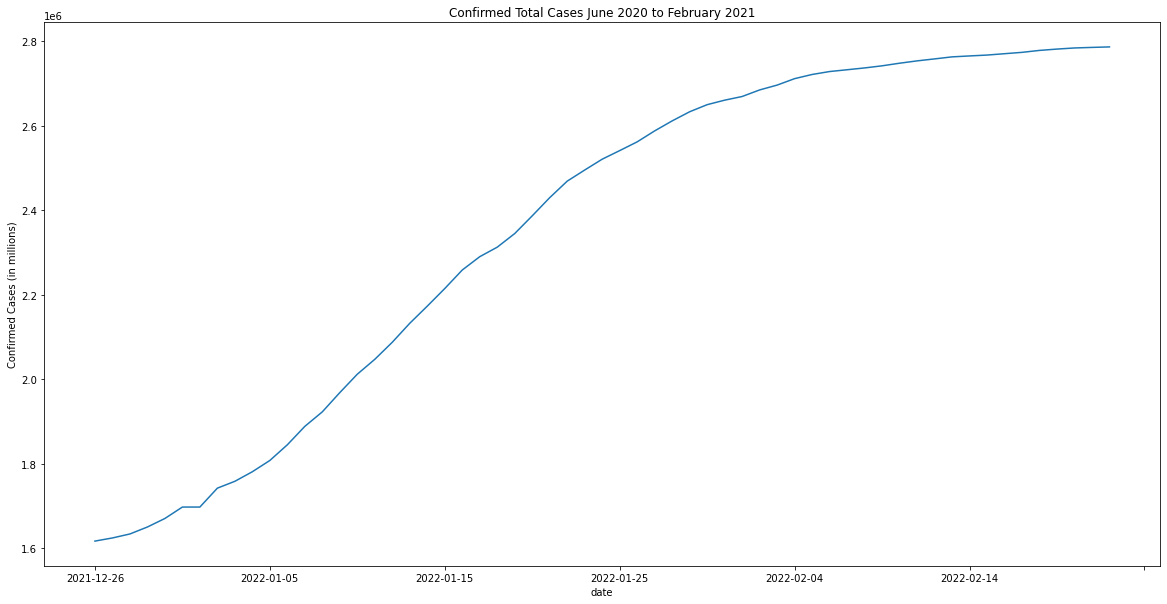

In [71]:
ax = LA.plot(
        title = 'Confirmed Total Cases June 2020 to February 2021',
        x = 'date',
        y = 'confirmed',
        legend = None,
        figsize = (20,10)
    )
ax.set_ylabel("Confirmed Cases (in millions)")

Covid Tweet Data

In [72]:
import random
a = random.randint(0,1000)

In [73]:
import tweepy 
import math
from tweepy.api import API

AD = {}

file_list = ['2021-12-26-12.txt','2022-01-05-12.txt','2022-01-15-12.txt','2022-01-25-12.txt',
             '2022-02-04-12.txt','2022-02-14-12.txt']

for x in range(6):
    AV = pd.read_csv(file_list[x])

    conkey="NzXNjreeXij0aBfbDNymHdOUO"
    consec="sSzNkdeJBMzyOsS1d2k1BfIXgGarhBV4Z67EkD05SpIpHB1EzW"
    acckey="497902086-pGQb4XwT1ZboDrLRV7FnBmf3YuacRUa3UF9frsKW"
    acckeysec="4trhSiHe0tHIYr1M6u9RQPB11pQU1vXiSGHSjhnHVfdnR"
    auth = tweepy.OAuthHandler(conkey,consec)
    auth.set_access_token(acckey,acckeysec)
    api = tweepy.API(auth)
    if x == 0:
        id = 1475194761715798017
    elif x == 1:
        id = 1478818577536987136
    elif x == 2:
        id = 1482442449876365321
    elif x == 3:
        id = 1486066343577280517
    elif x == 4:
        id = 1489690252486885380
    elif x == 5:
        id = 1493314103448051712
    user = api.get_status(id)
    created_at = user.created_at

    Num = len(AV)

    AD[created_at] = Num

LA_tweets = pd.DataFrame(AD.items(), columns=['Date',"Amount_of_Tweets"])
LA_tweets

,Date,Amount_of_Tweets
0,2021-12-26 20:00:13+00:00,8117
1,2022-01-05 19:59:58+00:00,18029
2,2022-01-15 19:59:57+00:00,8484
3,2022-01-25 20:00:00+00:00,10824
4,2022-02-04 20:00:07+00:00,5871
5,2022-02-14 20:00:01+00:00,6404


Text(0, 0.5, 'Number of Tweets')

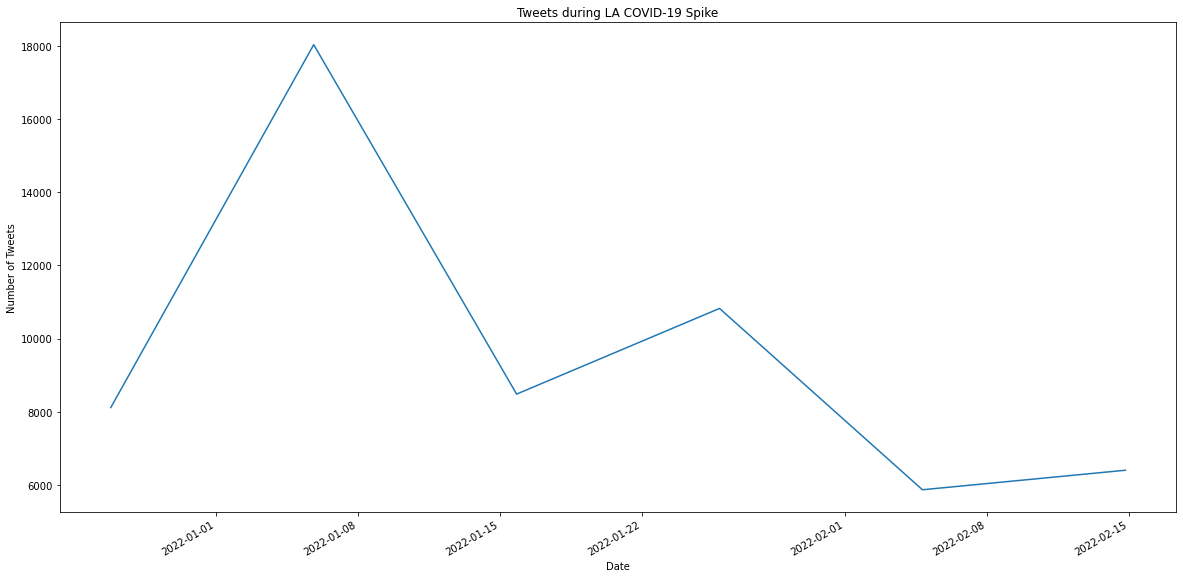

In [74]:
ax = LA_tweets.plot(
        title = 'Tweets during LA COVID-19 Spike',
        x = 'Date',
        y = 'Amount_of_Tweets',
        legend = None,
        figsize = (20,10)
    )
ax.set_ylabel("Number of Tweets")